# 소개

In [1]:
import cv2
cv2.__version__

'4.7.0'

# 이미지 로드하기

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [18]:
image = cv2.imread('./datasets/plane.jpg', cv2.IMREAD_GRAYSCALE)

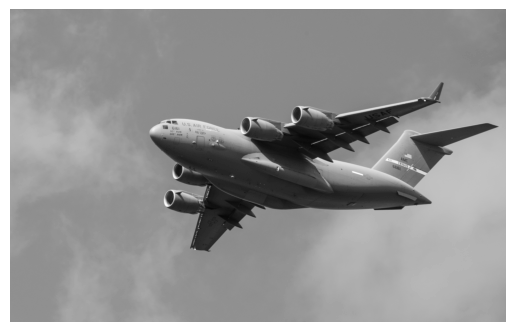

In [19]:
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

In [20]:
type(image)

numpy.ndarray

In [21]:
image

array([[140, 136, 146, ..., 132, 139, 134],
       [144, 136, 149, ..., 142, 124, 126],
       [152, 139, 144, ..., 121, 127, 134],
       ...,
       [156, 146, 144, ..., 157, 154, 151],
       [146, 150, 147, ..., 156, 158, 157],
       [143, 138, 147, ..., 156, 157, 157]], dtype=uint8)

In [22]:
image.shape

(2270, 3600)

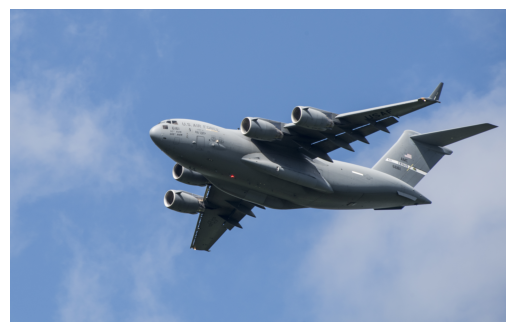

In [24]:
image_bgr = cv2.imread('./datasets/plane.jpg')
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

# 이미지 저장

In [25]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
image = cv2.imread('./datasets/plane.jpg', cv2.IMREAD_GRAYSCALE)

In [28]:
cv2.imwrite('./datasets/plane_new.jpg', image)

True

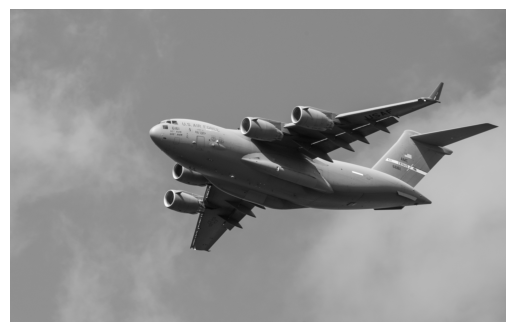

In [29]:
image = cv2.imread('./datasets/plane_new.jpg', cv2.IMREAD_GRAYSCALE)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.axis('off')
plt.show()

# 이미지 크기 변경

In [30]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
image = cv2.imread('./datasets/plane.jpg', cv2.IMREAD_GRAYSCALE)

In [31]:
image_50x50 = cv2.resize(image, (50, 50))

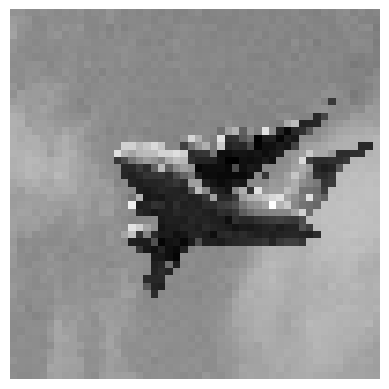

In [32]:
plt.imshow(image_50x50, cmap='gray')
plt.axis('off')
plt.show()

In [36]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
image = cv2.imread('./datasets/plane.jpg', cv2.IMREAD_GRAYSCALE)
image_256x256 = cv2.resize(image, (256, 256))
cv2.imwrite('./datasets/plane_256x256.jpg', image_256x256)

True

# 이미지 자르기

In [37]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
image = cv2.imread('./datasets/plane_256x256.jpg', cv2.IMREAD_GRAYSCALE)

In [38]:
image_cropped = image[:, :128]

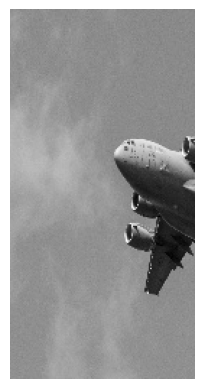

In [39]:
plt.imshow(image_cropped, cmap='gray')
plt.axis('off')
plt.show()

# 이미지 흐리게 하기

In [40]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
image = cv2.imread('./datasets/plane_256x256.jpg', cv2.IMREAD_GRAYSCALE)

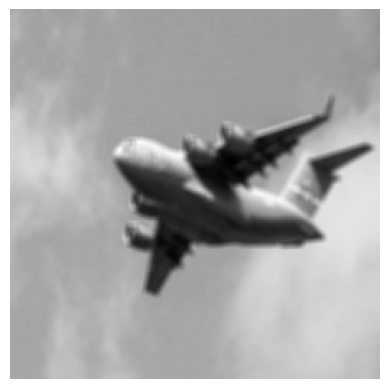

In [44]:
image_blurry = cv2.blur(image, (5,5))
plt.imshow(image_blurry, cmap='gray')
plt.axis('off')
plt.show()

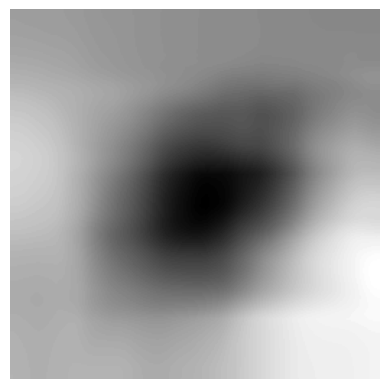

In [45]:
image_blurry = cv2.blur(image, (100,100))
plt.imshow(image_blurry, cmap='gray')
plt.axis('off')
plt.show()

In [46]:
kernel = np.ones((5,5)) / 25.0

In [47]:
kernel

array([[0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04]])

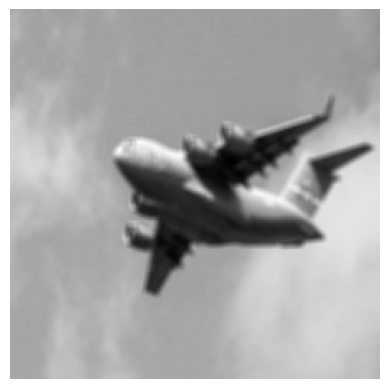

In [48]:
image_kernel = cv2.filter2D(image, -1, kernel)
plt.imshow(image_kernel, cmap='gray')
plt.axis('off')
plt.show()

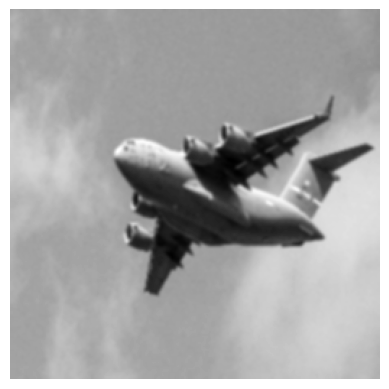

In [49]:
image_very_blurry = cv2.GaussianBlur(image, (5,5), 0)
plt.imshow(image_very_blurry, cmap='gray')
plt.axis('off')
plt.show()

In [53]:
gaus_vector = cv2.getGaussianKernel(5, 0)
gaus_vector

array([[0.0625],
       [0.25  ],
       [0.375 ],
       [0.25  ],
       [0.0625]])

In [55]:
gaus_kernel = np.outer(gaus_vector, gaus_vector)
gaus_kernel

array([[0.00390625, 0.015625  , 0.0234375 , 0.015625  , 0.00390625],
       [0.015625  , 0.0625    , 0.09375   , 0.0625    , 0.015625  ],
       [0.0234375 , 0.09375   , 0.140625  , 0.09375   , 0.0234375 ],
       [0.015625  , 0.0625    , 0.09375   , 0.0625    , 0.015625  ],
       [0.00390625, 0.015625  , 0.0234375 , 0.015625  , 0.00390625]])

<Axes: >

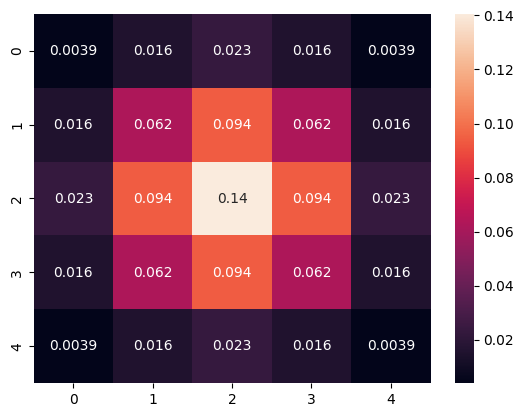

In [58]:
import seaborn as sns

sns.heatmap(gaus_kernel, annot=True)

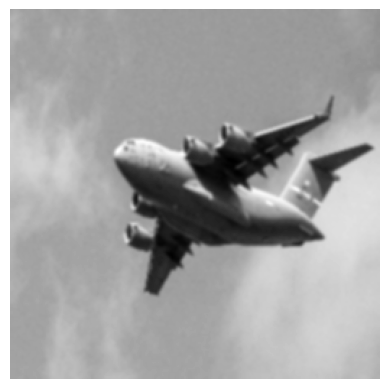

In [60]:
iamge_kernel = cv2.filter2D(image, -1, gaus_kernel)
plt.imshow(iamge_kernel, cmap='gray')
plt.axis('off')
plt.show()

# 이미지 선명하게 하기

In [61]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
image = cv2.imread('./datasets/plane_256x256.jpg', cv2.IMREAD_GRAYSCALE)

In [62]:
kernel = np.array([[0, -1, 0],
                  [-1, 5, -1],
                  [0,-1, 0]])

In [63]:
image_sharp = cv2.filter2D(image, -1, kernel)

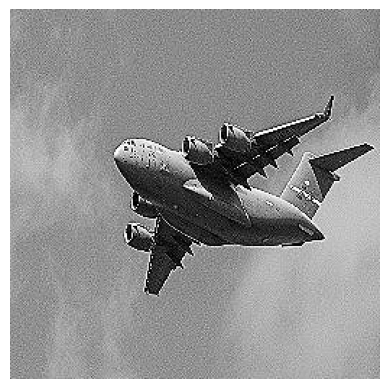

In [65]:
plt.imshow(image_sharp, cmap='gray')
plt.axis('off')
plt.show()

# 대비 높이기

In [66]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
image = cv2.imread('./datasets/plane_256x256.jpg', cv2.IMREAD_GRAYSCALE)

In [67]:
image_enhanced = cv2.equalizeHist(image)

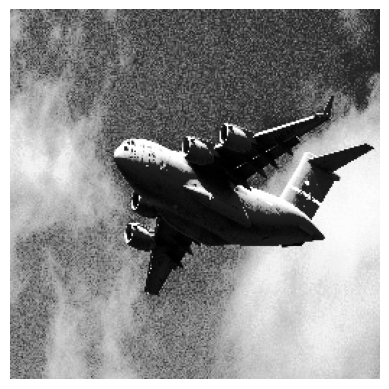

In [68]:
plt.imshow(image_enhanced, cmap='gray')
plt.axis('off')
plt.show()

In [71]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
image_bgr = cv2.imread('./datasets/plane.jpg')
image_yuv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2YUV)

In [72]:
image_yuv[:, :, 0] = cv2.equalizeHist(image_yuv[:, :, 0])

In [73]:
image_rgb = cv2.cvtColor(image_yuv, cv2.COLOR_YUV2RGB)

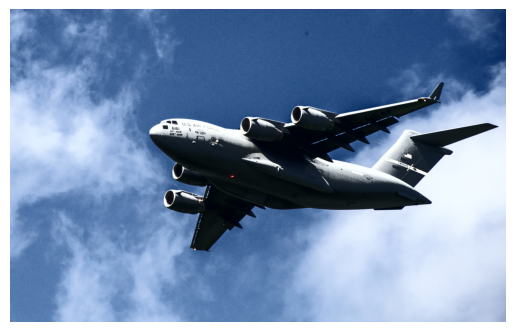

In [74]:
plt.imshow(image_rgb, cmap='gray')
plt.axis('off')
plt.show()

# 색깔 구분하기

In [89]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
image_bgr = cv2.imread('./datasets/plane.jpg')

In [90]:
image_hsv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2HSV)

In [91]:
lower_blue = np.array([50, 100, 50])
upper_blue = np.array([130, 255, 255])

In [92]:
mask = cv2.inRange(image_hsv, lower_blue, upper_blue)

In [93]:
image_bgr_masked = cv2.bitwise_and(image_bgr, image_bgr, mask=mask)

In [94]:
image_rgb = cv2.cvtColor(image_bgr_masked, cv2.COLOR_BGR2RGB)

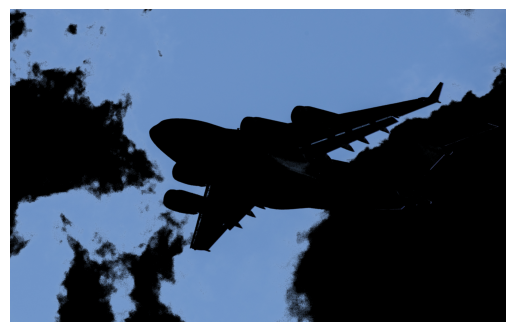

In [95]:
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

# 이미지 이진화하기

In [98]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
image_grey = cv2.imread('./datasets/plane_256x256.jpg', cv2.IMREAD_GRAYSCALE)

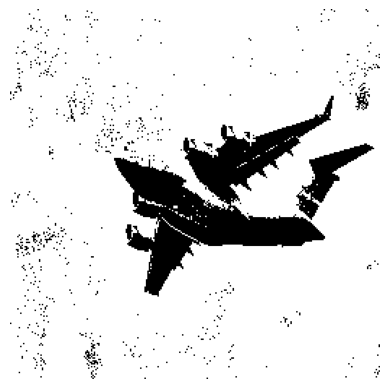

In [99]:
# 적응적 임계처리를 적용합니다.
max_output_value = 255
neighborhood_size = 99
subtract_from_mean = 10
image_binarized = cv2.adaptiveThreshold(image_grey,
                                        max_output_value,
                                        cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                        cv2.THRESH_BINARY,
                                        neighborhood_size,
                                        subtract_from_mean)

# 이미지를 출력합니다.
plt.imshow(image_binarized, cmap="gray"), plt.axis("off")
plt.show()

# 배경 제거하기

In [100]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
image_bgr = cv2.imread('./datasets/plane_256x256.jpg')
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

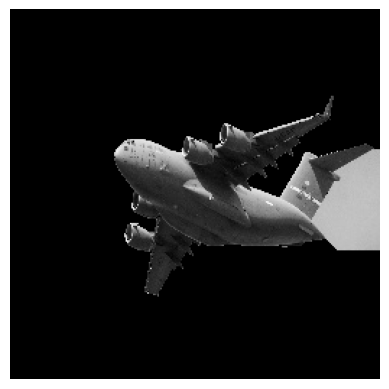

In [101]:
# 사각형 좌표: 시작점의 x, 시작점의 y, 너비, 높이
rectangle = (0, 56, 256, 150)

# 초기 마스크를 만듭니다.
mask = np.zeros(image_rgb.shape[:2], np.uint8)

# grabCut에 사용할 임시 배열을 만듭니다.
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

# grabCut을 실행합니다.
cv2.grabCut(image_rgb, # 원본 이미지
            mask, # 마스크
            rectangle, # 사각형
            bgdModel, # 배경을 위한 임시 배열
            fgdModel, # 전경을 위한 임시 배열
            5, # 반복 횟수
            cv2.GC_INIT_WITH_RECT) # 사각형을 사용한 초기화

# 배경인 곳은 0, 그외에는 1로 설정한 마스크를 만듭니다.
mask_2 = np.where((mask==2) | (mask==0), 0, 1).astype('uint8')

# 이미지에 새로운 마스크를 곱해 배경을 제외합니다.
image_rgb_nobg = image_rgb * mask_2[:, :, np.newaxis]

# 이미지를 출력합니다.
plt.imshow(image_rgb_nobg), plt.axis("off")
plt.show()

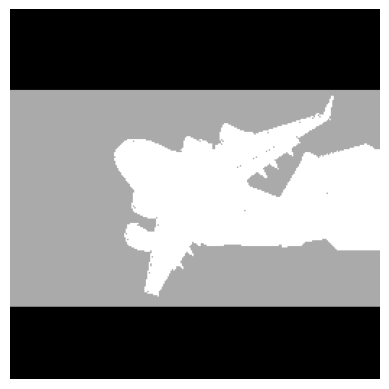

In [102]:
# 마스크를 출력합니다.
plt.imshow(mask, cmap='gray'), plt.axis("off")
plt.show()

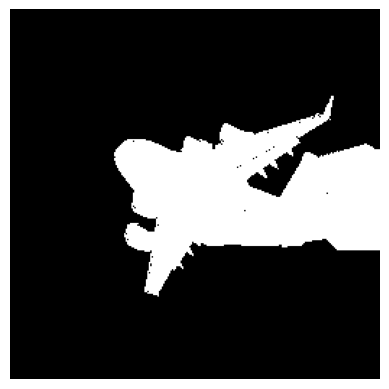

In [103]:
# 마스크를 출력합니다.
plt.imshow(mask_2, cmap='gray'), plt.axis("off")
plt.show()

# 경계선 감지하기

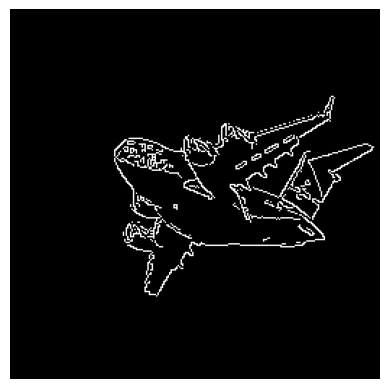

In [104]:
# 라이브러리를 임포트합니다.
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 흑백 이미지로 로드합니다.
image_gray = cv2.imread("./datasets/plane_256x256.jpg", cv2.IMREAD_GRAYSCALE)

# 픽셀 강도의 중간값을 계산합니다.
median_intensity = np.median(image_gray)

# 중간 픽셀 강도에서 위아래 1 표준 편차 떨어진 값을 임계값으로 지정합니다.
lower_threshold = int(max(0, (1.0 - 0.33) * median_intensity))
upper_threshold = int(min(255, (1.0 + 0.33) * median_intensity))

# 캐니 경계선 감지기를 적용합니다.
image_canny = cv2.Canny(image_gray, lower_threshold, upper_threshold)

# 이미지를 출력합니다.
plt.imshow(image_canny, cmap="gray"), plt.axis("off")
plt.show()

# 모서리 감지

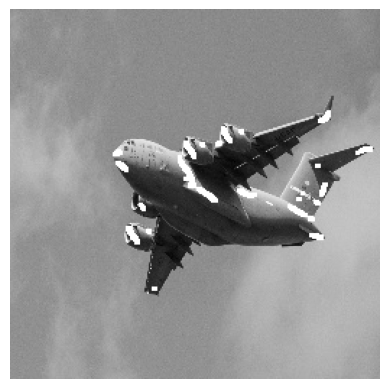

In [106]:
# 라이브러리를 임포트합니다.
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 흑백 이미지로 로드합니다.
image_bgr = cv2.imread("./datasets/plane_256x256.jpg")
image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)
image_gray = np.float32(image_gray)

# 모서리 감지 매개변수를 설정합니다.
block_size = 2
aperture = 29
free_parameter = 0.04

# 모서리를 감지합니다.
detector_responses = cv2.cornerHarris(image_gray,
                                      block_size,
                                      aperture,
                                      free_parameter)

# 모서리 표시를 부각시킵니다.
detector_responses = cv2.dilate(detector_responses, None)

# 임계값보다 큰 감지 결과만 남기고 흰색으로 표시합니다.
threshold = 0.02
image_bgr[detector_responses >
          threshold *
          detector_responses.max()] = [255,255,255]

# 흑백으로 변환합니다.
image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)

# 이미지를 출력합니다.
plt.imshow(image_gray, cmap="gray"), plt.axis("off")
plt.show()

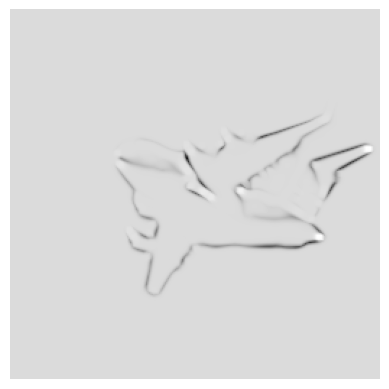

In [107]:
plt.imshow(detector_responses, cmap='gray')
plt.axis('off')
plt.show()

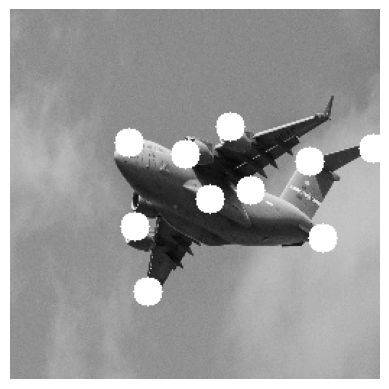

In [109]:
# 이미지를 로드합니다.
image_bgr = cv2.imread('./datasets/plane_256x256.jpg')
image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)

# 감지할 모서리 개수
corners_to_detect = 10
minimum_quality_score = 0.05
minimum_distance = 25

# 모서리를 감지합니다.
corners = cv2.goodFeaturesToTrack(image_gray,
                                  corners_to_detect,
                                  minimum_quality_score,
                                  minimum_distance)
corners = np.float32(corners)

# 모서리마다 흰 원을 그립니다.
for corner in corners:
    x, y = corner[0].astype('int')
    cv2.circle(image_bgr, (x,y), 10, (255,255,255), -1)

# 흑백 이미지로 변환합니다.
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)

# 이미지를 출력합니다.
plt.imshow(image_rgb, cmap='gray'), plt.axis("off")
plt.show()

# 머신러닝 특성 만들기

In [110]:
# 이미지를 로드합니다.
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 흑백 이미지로 로드합니다.
image = cv2.imread("./datasets/plane_256x256.jpg", cv2.IMREAD_GRAYSCALE)

# 이미지를 10x10 픽셀 크기로 변환합니다.
image_10x10 = cv2.resize(image, (10, 10))

# 이미지 데이터를 1차원 벡터로 변환합니다.
image_10x10.flatten()

array([138, 141, 141, 138, 139, 136, 136, 138, 135, 137, 141, 140, 138,
       135, 140, 139, 143, 133, 140, 131, 155, 155, 144, 141, 138, 134,
       135, 139, 143, 133, 176, 175, 145, 152, 138, 134, 119,  40, 159,
       177, 180, 182, 150,  49,  76,  22,  31, 159,  49, 190, 162, 153,
       153,  46,  50,  35, 117, 141, 194, 192, 145, 148, 144,  69,  15,
       141, 152, 181, 188, 186, 143, 145, 148, 153, 141, 144, 176, 176,
       177, 176, 140, 163, 155, 151, 146, 144, 172, 169, 179, 176, 147,
       161, 151, 151, 145, 145, 168, 171, 176, 167], dtype=uint8)

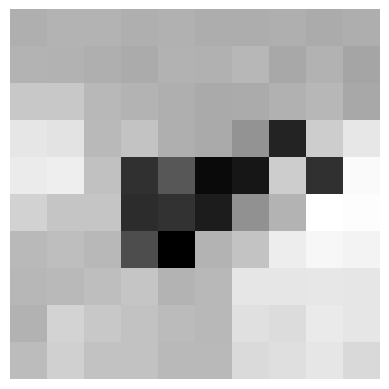

In [111]:
plt.imshow(image_10x10, cmap="gray"), plt.axis("off")
plt.show()

In [112]:
image_10x10.shape

(10, 10)

In [113]:
image_10x10.flatten().shape

(100,)

In [115]:
# 이미지를 로드합니다.
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 흑백 이미지로 로드합니다.
image_color = cv2.imread("./datasets/plane_256x256.jpg", cv2.IMREAD_COLOR)

In [116]:
image_color_10x10 = cv2.resize(image_color, (10, 10))

In [117]:
image_color_10x10.flatten().shape

(300,)

In [118]:
image_256x256_gray = cv2.imread("./datasets/plane_256x256.jpg", cv2.IMREAD_GRAYSCALE)
image_256x256_gray.flatten().shape

(65536,)

In [119]:
image_256x256_color = cv2.imread("./datasets/plane_256x256.jpg", cv2.IMREAD_COLOR)
image_256x256_color.flatten().shape

(196608,)

# 평균 색을 특성으로 인코딩

In [132]:
# 라이브러리를 임포트합니다.
import cv2
import numpy as np
from matplotlib import pyplot as plt

# BGR 이미지로 로드합니다.
image_bgr = cv2.imread("./datasets/plane.jpg", cv2.IMREAD_COLOR)

# 각 채널의 평균을 계산합니다.
channels = cv2.mean(image_bgr)

# 파랑과 빨강을 바꿉니다(BGR에서 RGB로 만듭니다)
observation = np.array([(channels[2], channels[1], channels[0])])

# 채널 평균 값을 확인합니다.
observation

array([[118.18051371, 144.25418612, 181.74271549]])

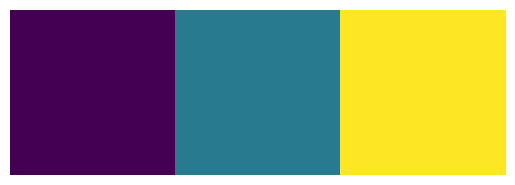

In [133]:
# 이미지를 출력합니다.
plt.imshow(observation), plt.axis("off")
plt.show()

# 컬러 히스토그램을 특성으로 인코딩

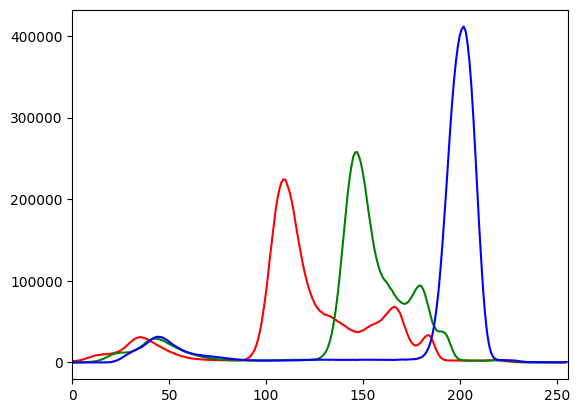

array([2275., 1709., 1923., 2296., 2769.], dtype=float32)

In [139]:
# 라이브러리를 임포트합니다.
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 이미지를 로드합니다.
image_bgr = cv2.imread("./datasets/plane.jpg", cv2.IMREAD_COLOR)

# RGB로 변환합니다.
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# 특성 값을 담을 리스트를 만듭니다.
features = []

# 각 컬러 채널에 대해 히스토그램을 계산합니다.
colors = ("r","g","b")

# 각 채널을 반복하면서 히스토그램을 계산하고 리스트에 추가합니다.
for i, channel in enumerate(colors):
    histogram = cv2.calcHist([image_rgb], # 이미지
                        [i], # 채널 인덱스
                        None, # 마스크 없음
                        [256], # 히스토그램 크기
                        [0,256]) # 범위
    features.extend(histogram)
    plt.plot(histogram, color = channel)
    plt.xlim([0,256])    
plt.show()
# 샘플의 특성 값으로 벡터를 만듭니다.
observation = np.array(features).flatten()

# 처음 다섯 개의 특성을 출력합니다.
observation[0:5]